# Проект: Исследование стартапов

- Автор: Новикова Полина
- Дата: 19.03.2025

### Цели и задачи проекта

<font color='#777778'> Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. 
    
**Цель:** Выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных. Для этого нужно подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
    
**Задачи:** 
* по каким столбцам можно объединять данные из разных таблиц;
* можно ли доверять данным о сотрудниках стартапов и их образовании;    
* что значат покупки за 0 или за 1 доллар;
* какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
* как рассчитать и отобразить численные показатели и динамику.</font>

### Описание данных

<font color='#777778'> Данные, которые пригодятся при анализе:
1. Таблица `acquisition` содержит информацию о покупках одними компаниями других компаний:
* `id` — идентификатор покупки.
* `acquiring_company_id` — идентификатор покупающей компании.
* `acquired_company_id` — идентификатор покупаемой компании.
* `term_code` — варианты расчёта.
* `price_amoun` — сумма сделки.
* `acquired_at` — дата сделки.

2. Таблица `company_and_rounds` содержит информацию о компаниях и раундах финансирования:
* `company ID` — идентификатор компании.
* `name` — название компании.
* `category code` — категория области деятельности компании.
* `status` — статус компании.
* `founded at` — дата инвестирования.
* `closed at` — дата закрытия компании.
* `domain` — официальный сайт компании.
* `network username` — ник компании в сети.
* `country code` — код страны компании.
* `investment round`s — число инвестиционных раундов.
* `funding rounds` — число раундов финансирования.
* `funding total` — сумма финансирования.
* `milestones` — вехи финансирования.
* `funding round id` — идентификатор этапа финансирования.
* `company id` — идентификатор компании.
* `funded at` — дата финансирования.
* `funding round type` — тип финансирования.
* `raised amount` — сумма финансирования.
* `pre money valuation` — предварительная денежная оценка.
* `participants` — число участников.
* `is first round` — является ли раунд первым.
* `is last round` — является раунд последним.

3. Таблица `education` содержит информацию об образовании сотрудника:
* `id` — идентификатор записи об образовании.
* `person_id` — идентификатор работника.
* `instituition` — название учебного заведения.
* `graduated_at` — дата получения образования.

4. Таблица `people` содержит информацию о сотрудниках:
* `id` — идентификатор сотрудника.
* `first_name` — имя сотрудника.
* `last_name` — фамилия сотрудника.
* `company_id` — идентификатор компании.
* `network_username` — ник в социальных сетях.

5. Таблица `degrees` содержит информацию о типе образования сотрудника:
* `id` — идентификатор записи.
* `object_id` — идентификатор сотрудника.
* `degree_type` — тип образования.
* `subject` — специальность.
    
    Дополнительные таблицы:
1. Таблица `fund` содержит информацию о фондах:
* `id` — идентификатор фонда.
* `name` — название фонда.
* `category_code` — категория области деятельности компании.
* `founded_at` — дата создания фонда.
* `domain` — сайт фонда.
* `network_username` — ник фонда в сети.
* `country_code` — код страны фонда.
* `investment_rounds` — число инвестиционных раундов.
* `invested_companies` — число профинансированных компаний.
* `milestones` — вехи финансирования.

2. Таблица `investment` содержит информацию о раундах инвестирования:
* `id` — идентификатор этапа инвестирования.
* `funding_round_id` — идентификатор раунда инвестирования.
* `company_id` — индентификатор компании.
* `funding_round_type` — тип финансирования.
* `fund_id` — идентификатор фонда.
</font>

### Содержимое проекта

<font color='#777778'>
    
1. Знакомство с данными: загрузка и первичная предобработка.
    
    1.1. Вывод общей информации, исправление названия столбцов.
    
    1.2. Смена типов и анализ пропусков.

    
2. Предобработка данных, предварительное исследование.
    
    2.1. Раунды финансирования по годам.
    
    2.2. Люди и их образование.
    
    2.3. Объединять или не объединять — вот в чём вопрос.
    
    2.4. Проблемный датасет и причина возникновения пропусков.

    
3. Исследовательский анализ объединённых таблиц.
    
    3.1. Объединение данных.
    
    3.2. Анализ выбросов.
    
    3.3. Куплены забесплатно?
    
    3.4. Цены стартапов по категориям.
    
    3.5. Сколько раундов продержится стартап перед покупкой.

    
4. Итоговый вывод и рекомендации.</font>

---


## Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, т.к. выполняем работу на платформе. 

### Вывод общей информации, исправление названия столбцов

- Начнем с загрузки необходимых для анализа библиотек. Затем загрузим данные с датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные 
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [3]:
# Выводим первые строки датафрейма на экран
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим первые строки датафрейма на экран
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Выводим первые строки датафрейма на экран
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [6]:
# Выводим первые строки датафрейма на экран
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [7]:
# Выводим первые строки датафрейма на экран
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


* Проверим названия столбцов в датафреймах.

In [8]:
# Выводим названия столбцов датафреймов
print(f'Названия столбцов датафрейма acquisition:', acquisition.columns)
print(f'Названия столбцов датафрейма company_and_rounds:', company_and_rounds.columns)
print(f'Названия столбцов датафрейма people:', people.columns)
print(f'Названия столбцов датафрейма education:', education.columns)
print(f'Названия столбцов датафрейма degrees:', degrees.columns)

Названия столбцов датафрейма acquisition: Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')
Названия столбцов датафрейма company_and_rounds: Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
Названия столбцов датафрейма people: Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')
Названия столбцов датафрейма education: Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')
Названия столбцов датафрейма degrees: Index(['id', 'object_id', 'degree_type', 'subject'], dt

Как можно заметить в 4/5 столбцов названия приведены к стилю `snake_case`, кроме столбца `company_and_rounds`. Также можно заметить, что в данном столбце дважды встречаются: 'company  ID' и 'company  id', было принято что 
'company  ID' переименуем в 'company_id_rounds', а все остальные столбцы приведем к стилю `snake_case`.

In [9]:
# Переименуем отдельный столбец
company_and_rounds = company_and_rounds.rename(columns = {'company  ID':'company_id_rounds'})
# Приведем все остальные столбцы к стилю snake_case
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ', '_')
# Выведем на экран, получившийся результат
print(f'Названия столбцов датафрейма company_and_rounds:', company_and_rounds.columns)

Названия столбцов датафрейма company_and_rounds: Index(['company_id_rounds', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


* Выведим информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [10]:
# Выводим информацию о датафрейме
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition` содержит 6 столбцов и 9407 строк.

После первичного анализа данных можно сделать следующие выводы:

-  Почти во всех столбцах представлены значения целыми числами (`int64`). Кроме столбцов `term_code` и `acquired_at`, они представлены в типе `object`. 
- Изменить тип данных стоит только а столбце `acquired_at` на `datetime64[ns]`.
- Пропуски содержатся только в столбцах `term_code` и `acquired_at`. 

In [11]:
# Выводим информацию о датафрейме
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id_rounds    217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

Датасет `company_and_rounds` содержит 22 столбца и 217774 строк:
- В каждом столбце присутствуют пропуски.
- Значения разделились на `float64`(12 столбцов), `object`(10 столбцов). 
- Нужно изменить значения в столбцах `founded_at`, `closed at`, `funded at` с `object` на `datetime64[ns]`.

In [12]:
# Выводим информацию о датафрейме
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people` содержит 5 столбцов и 226709 строк:
- Пропуски в столбцах `company_id` и `network_username`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [13]:
# Выводим информацию о датафрейме
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education` содержит 4 столбца и 109610 строк:
- Пропуски в столбцах `instituition` и `instituition`.
- Нужно привести столбец `instituition` с `object` на `datetime64[ns]`.
- Остальные значения в столбцах соответствуют своему описанию.

In [14]:
# Выводим информацию о датафрейме
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees` содержит 4 столбца и 109610 строк:
- Пропуски в столбцах `degree_type` и `subject`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Смена типов и анализ пропусков

Проанализировав информацию по всем датафреймам, была выявлена тенденция: нужно привести столбцы с датами из типа `object` в `datetime64[ns]`.

In [15]:
# Преобразовываем данные к datetime64[ns]
acquisition['acquired_at'] = acquisition['acquired_at'].astype('datetime64[ns]')
# Проверяем 
print('acquired_at:', acquisition['acquired_at'].dtypes)

acquired_at: datetime64[ns]


In [16]:
# Преобразовываем данные к datetime64[ns]
company_and_rounds[['founded_at', 'closed_at', 'funded_at']] = company_and_rounds[['founded_at', 'closed_at', 'funded_at']].astype('datetime64[ns]')
# Проверяем 
print(company_and_rounds[['founded_at', 'closed_at', 'funded_at']].dtypes)

founded_at    datetime64[ns]
closed_at     datetime64[ns]
funded_at     datetime64[ns]
dtype: object


In [17]:
# Преобразовываем данные к datetime64[ns]
education['graduated_at'] = education['graduated_at'].astype('datetime64[ns]')
# Проверяем 
print('graduated_at:', education['graduated_at'].dtypes)

graduated_at: datetime64[ns]


С помощью метода info() определили,что есть пропуски. Поэтому стоит проанализировать процент пустых значений со всеми остальными значениями.

In [18]:
# Применяем метод isna() к датафрейму acquisition
acquisition_isna = acquisition.isna().sum().sort_values(ascending = False)
print(acquisition_isna)
# Подсчитываем процент строк с пропусками
round((acquisition_isna / acquisition.shape[0] * 100), 2)

term_code               7576
acquired_at               29
id                         0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64


term_code               80.54
acquired_at              0.31
id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
price_amount             0.00
dtype: float64

In [19]:
# Применяем метод isna() к датафрейму company_and_rounds
company_and_rounds_isna = company_and_rounds.isna().sum().sort_values(ascending = False)
print(company_and_rounds_isna)
# Подсчитываем процент строк с пропусками
round((company_and_rounds_isna / company_and_rounds.shape[0] * 100), 2)

closed_at              214325
funded_at              165094
is_last_round          164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_type     164846
funding_round_id       164846
company_id             164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
company_id_rounds         302
milestones                302
name                      302
funding_rounds            302
investment_rounds         302
status                    302
funding_total             302
dtype: int64


closed_at              98.42
funded_at              75.81
is_last_round          75.70
is_first_round         75.70
participants           75.70
pre_money_valuation    75.70
raised_amount          75.70
funding_round_type     75.70
funding_round_id       75.70
company_id             75.70
network_username       56.13
country_code           50.13
founded_at             49.51
category_code          33.93
domain                 32.43
company_id_rounds       0.14
milestones              0.14
name                    0.14
funding_rounds          0.14
investment_rounds       0.14
status                  0.14
funding_total           0.14
dtype: float64

In [20]:
# Применяем метод isna() к датафрейму people
people_isna = people.isna().sum().sort_values(ascending = False)
print(people_isna)
# Подсчитываем процент строк с пропусками
round((people_isna / people.shape[0] * 100), 4)

company_id          192094
network_username    187842
first_name               5
last_name                1
id                       0
dtype: int64


company_id          84.7315
network_username    82.8560
first_name           0.0022
last_name            0.0004
id                   0.0000
dtype: float64

In [21]:
# Применяем метод isna() к датафрейму education
education_isna = education.isna().sum().sort_values(ascending = False)
print(education_isna)
# Подсчитываем процент строк с пропусками
round((education_isna / education.shape[0] * 100), 2)

graduated_at    51556
instituition       55
id                  0
person_id           0
dtype: int64


graduated_at    47.04
instituition     0.05
id               0.00
person_id        0.00
dtype: float64

In [22]:
# Применяем метод isna() к датафрейму degrees
degrees_isna = degrees.isna().sum().sort_values(ascending = False)
print(degrees_isna)
# Подсчитываем процент строк с пропусками
round((degrees_isna / degrees.shape[0] * 100), 2)

subject        28312
degree_type    11218
id                 0
object_id          0
dtype: int64


subject        25.83
degree_type    10.23
id              0.00
object_id       0.00
dtype: float64

Можно заметить, что в каждом датафрейме есть пропуски, они могут достигать до 98%. Поэтому гипотеза о причине пропусков следующая: скорее всего на этапе сбора или импорта потерялась часть данных. Поэтому пропуски лучше оставить как есть, т.к. их заполнение может искажать анализ.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [23]:
# Выделим год из столбца funded_at
c_r = company_and_rounds
c_r['year'] = company_and_rounds['funded_at'].dt.year
# Проверим 
print(c_r['year'])

0         2005.0
1         2007.0
2         2008.0
3            NaN
4            NaN
           ...  
217769    2011.0
217770    2011.0
217771    2012.0
217772    2013.0
217773    2013.0
Name: year, Length: 217774, dtype: float64


In [24]:
# Сделаем группировку по годам, где укажем типичный размер средств и общее количество раундов 
grouped_data = c_r.groupby('year').agg({
    'raised_amount': 'median', 
    'funding_round_type': 'count'})
# Отфильтруем данные и оставим информацию только для тех лет, 
# для которых есть информация о более чем 50 раундах финансирования
filtered_data = grouped_data[grouped_data['funding_round_type'] > 50]
display(filtered_data)

,raised_amount,funding_round_type
year,,
1999.0,2000000.0,76
2000.0,4200000.0,125
2001.0,3000000.0,96
2002.0,4200000.0,116
2003.0,3000000.0,159
2004.0,5000000.0,291
2005.0,5500000.0,1633
2006.0,5000000.0,2436
2007.0,3973320.0,3279


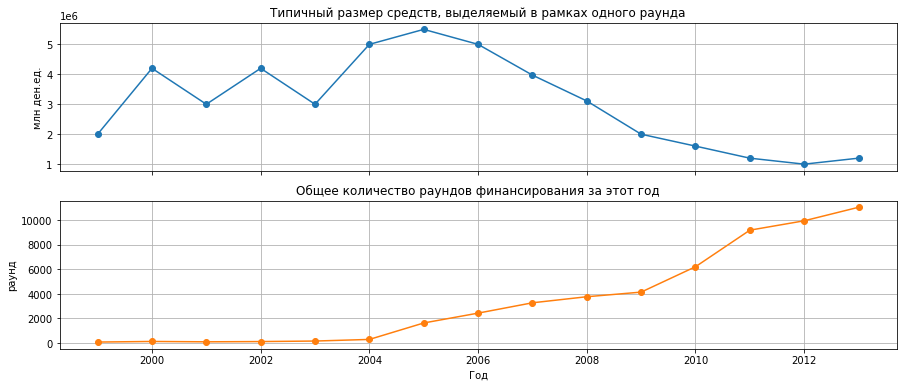

In [25]:
# Строим график
axes = filtered_data.plot(kind='line', figsize=(15, 6),
                   subplots=True,
                   sharex=True,
                   sharey=False,
                   legend=False,
                   marker='o', # Установка маркера для точек
                   title=['Типичный размер средств, выделяемый в рамках одного раунда', 
                          'Общее количество раундов финансирования за этот год'])

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('млн ден.ед.') # миллион денежных едениц
axes[1].set_ylabel('раунд') 

# Включаем сетку для каждого из подграфиков
axes[0].grid(which='both')
axes[1].grid(which='both')

# Подписываем ось X
plt.xlabel('Год')
plt.show()

Проанализировав полученную таблицу и график, можно ответить на поставленные вопросы:
1. В 2005 году типичный размер собранных в рамках одного раунда средств был максимален и составлял 5.5 млн денежных едениц.
2. В 2013 году выявилась такая тенденция, что количество раундов стало максимальным за все время наблюдений (11072 раунда). При этом начался рост выделяемых средств в рамках каждого раунда (1.2 млн ден. ед.) после падения его в 2012 до критического минимума 1 млн ден.ед.


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

В датасете `people` указаны все работники компаний, а в датасете `education` только с образованием, если объединить их, то получим информацию о сотрудниках с образованием. 

In [26]:
# Объединим данные, для дальнейшего анализа
p_no_ed= people.merge(education, on='id', how = 'left')

In [27]:
# Напишем функцию чтобы посчитать среднюю долю сотрудников без образования
def edu_info(df, column_name, output_column):
    """
    Возвращает 1, если значение в столбце отсутствует (NaN, None или пустая строка), и 0, если значение присутствует.
    """
    df[output_column] = df[column_name].apply(lambda x: 1 if pd.isna(x) or x == "" else 0)
    return df

edu_info(p_no_ed, 'person_id', 'no_ed')
display(p_no_ed)

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,no_ed
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01,0
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01,0
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01,0
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT,0
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT,0
...,...,...,...,...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN,257599.0,HTBLuVA Mödling,NaT,0
226705,174088,Dr. Ray,Woods,188200.0,network,NaN,NaN,NaT,1
226706,118386,Ricardo,Durand,143419.0,itechsocialnet,NaN,NaN,NaT,1
226707,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,1


In [28]:
# Создаем новый столбец с рассчетом по количеству сотрудников
p_no_ed['company_sizes'] = p_no_ed.groupby('company_id')['id'].transform('count')

In [29]:
# Изучаем статистические показатели столбца company_sizes
print('Статистические показатели столбца company_sizes:')
p_no_ed['company_sizes'].describe(percentiles=[0.25, 0.5, 0.75,0.99])

Статистические показатели столбца company_sizes:


count    34615.000000
mean         6.570071
std         24.914213
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
99%        150.000000
max        244.000000
Name: company_sizes, dtype: float64

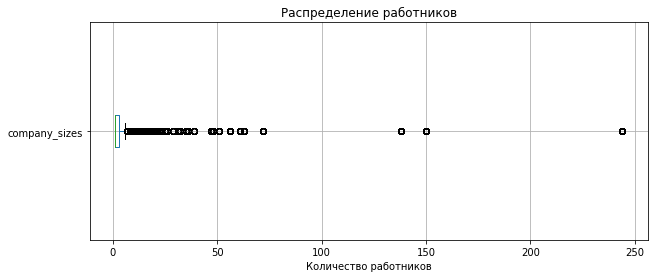

In [30]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 4))
p_no_ed.boxplot(column='company_sizes', vert=False)
plt.title('Распределение работников')
plt.xlabel('Количество работников')
plt.show()

Проанализировав статистические данные, можно сделать следующие выводы:
1. Общее количество сотрудников 34615 человек.
2. Минимальное и медианное значение равны и составляют 1, а максимальное 244.
3. Среднее значение и медиана различаются, это означает, что в данных есть выбросы.

Таким образом, разумнее всего сделать следующие категории:
- small (1-3 сотрудника) - выбраны на основе медианного значения (1) и 25-го перцентиля, так как 75% компаний имеют до 3 сотрудников.
- medium (4-50 сотрудников) - количество сотрудников составляет 6.57, а стандартное отклонение — 24.91. Определили верхнюю границу 50, чтобы отделить компании с числом сотрудников, близким к среднему, от компаний, где сотрудников значительно больше.
- large (51-244 сотрудников) - данные исходя из максимального значения (244).

In [31]:
# Создаем столбец по категориям
p_no_ed['company_type'] = pd.cut(p_no_ed['company_sizes'], 
                                                bins= [1, 3, 50, 244],
                                                labels= ['small', 'medium', 'large'])

In [32]:
# Проверим таблицу
p_no_ed.head()

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,no_ed,company_sizes,company_type
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01,0,61.0,large
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01,0,10.0,medium
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01,0,3.0,small
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT,0,2.0,small
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT,0,NaN,NaN


In [33]:
# Выводим результат группировки
result = p_no_ed.groupby('company_type').agg({'company_id':'count', 'company_sizes': 'sum', 'no_ed':'sum'})
result['no_ed'] = round(result['no_ed']/result['company_id'], 4)
print(result)

              company_id  company_sizes   no_ed
company_type                                   
small               8181        19125.0  0.3645
medium              7426        67354.0  0.3054
large                891       122827.0  0.3614


Объединив, все полученные результаты, можно проследить, что по количеству компаний преобладает категория `small` в ней 8181 компаний, в которых 1-3 сотрудника. При этом в этой категории также есть сотрудники без образования (36.5% от всех сотрудников, не имеют информации об образовании).

В категории `medium` 7426 компаний, где сотрудников 4-51 человек, и около 31% не имеют информации об образовании.

Наименьшая категория это `large` всего 891, однако именно тут наибольшее количество сотрудников, и доля людей без образования составляет 36.1%.

Отвечая на вопрос, в данном задании можео не присоединять таблицу `degrees`, т.к. данные уже полны.

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [34]:
# Извлекаем общий столбец из каждого датафрейма
series1 = company_and_rounds['network_username']
series2 = people['network_username']

In [35]:
# Проверяем на дубликаты в каждом Series
duplicates1 = series1.duplicated(keep=False)  # keep=False отмечает все дубликаты
duplicates2 = series2.duplicated(keep=False)

In [36]:
# Анализируем наличие общих дубликатов
# Создаем множества дубликатов 
duplicates_set1 = set(series1[duplicates1])
duplicates_set2 = set(series2[duplicates2])

In [37]:
# Находим пересечение множеств (общие дубликаты)
duplicate_usernames = duplicates_set1.intersection(duplicates_set2)

In [38]:
# Подсчитываем количество дубликатов
num_duplicates = len(duplicate_usernames)

In [39]:
# Общее количество уникальных значений в каждом датасете
total_company_usernames = len(company_and_rounds['network_username'].sort_values().unique())
total_people_usernames = len(people['network_username'].sort_values().unique())

In [40]:
# Вычисляем долю дубликатов относительно общего числа уникальных значений
fraction_in_company = num_duplicates / total_company_usernames if total_company_usernames > 0 else 0
fraction_in_people = num_duplicates / total_people_usernames if total_people_usernames > 0 else 0

In [41]:
# Вывод результатов
print(f"Общие дубликаты в обоих DataFrame: {duplicate_usernames}")
print(f"Уникальные network_username в company_and_rounds: {total_company_usernames}")
print(f"Уникальные network_username в people: {total_people_usernames}")
print(f"Количество дублирующихся значений: {num_duplicates}")
print(f"Доля дубликатов в company_and_rounds: {fraction_in_company:.2%}")
print(f"Доля дубликатов в people: {fraction_in_people:.2%}")

Общие дубликаты в обоих DataFrame: {nan, 'IWTINDIA', 'tektrak', 'brit', 'osiaffiliate', 'elementaltech', 'softwebchicago', 'ConnectAndSell', 'epactnetwork', 'konstantinfo'}
Уникальные network_username в company_and_rounds: 79572
Уникальные network_username в people: 38422
Количество дублирующихся значений: 10
Доля дубликатов в company_and_rounds: 0.01%
Доля дубликатов в people: 0.03%


Проанализировав, столбец `network_username`, который встречается в датасетах `company_and_rounds` и `people`, можно прийти к выводу: 
Доля дубликатов в датафреймах мала, но не стоит объединять по этому столбцу, так как у них разный контекст данных.


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [42]:
# Просмотрим первые 5 строк датасета
company_and_rounds.head()

,company_id_rounds,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для удобно дальнейшего анализа, переведем все столбцы в нижний регистр.

In [43]:
# Напишем функцию, которая поменяет текствое значение на нижний регистр
def to_lower(x):
    """Преобразует x в нижний регистр, если это строка, иначе возвращает x."""
    if isinstance(x, str):
        return x.lower()
    else:
        return x
company_and_rounds = company_and_rounds.applymap(to_lower)
# Проверим
display(company_and_rounds.head())

,company_id_rounds,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можно заметить, что датафрейм состоит из 2 частей. Поэтому следует их разделить и анализировать их по отдельности.

In [44]:
# Создаём датасет company из левой части таблицы company_and_rounds
company = company_and_rounds.iloc[:,0:13]
company.info()
display(company.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_rounds  217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


,company_id_rounds,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.0,0.0,0.0,4.0


In [45]:
# Создаём датасет roundss из правой части таблицы company_and_rounds
rounds = company_and_rounds.iloc[:,13:22]
rounds.info()
display(rounds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Проверим данные на наличие явных и неявных дубликатов, а потом будем решать, что сними делать. Начнём с полных дубликатов:

In [46]:
# Проверяем полные дубликаты в датафрейме company
company.duplicated().sum()

21220

In [47]:
# Проверяем полные дубликаты в датафрейме rounds
rounds.duplicated().sum()

164845

Теперь проверим корректность написания категориальных значений.

In [48]:
# Проверяем уникальные значения в категориальных столбцах company
for column in ['name', 'category_code', 'status', 'domain', 'network_username', 'country_code']:
    print(f'Уникальные значения в столбце {column}:')
    print(company[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['! haz life' '!mpossible'
 '!nterprise network services - us west communications' ... 'übermind'
 'überresearch' nan]

Уникальные значения в столбце category_code:
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'government' 'hardware' 'health' 'hospitality' 'legal'
 'local' 'manufacturing' 'medical' 'messaging' 'mobile' 'music' 'nanotech'
 'network_hosting' 'news' 'nonprofit' 'other' 'pets' 'photo_video'
 'public_relations' 'real_estate' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]

Уникальные значения в столбце status:
['acquired' 'closed' 'ipo' 'operating' nan]

Уникальные значения в столбце domain:
['0-6.com' '011now.com' '01com.com' ... 'zzwolf.com' 'zzzzapp.com' nan]

Уникальные значения в столбце network_username:
['01communique' '040hosting' '077football' ... 'zzwolf_official'


In [49]:
# Проверяем неявные дубликаты в rounds
rounds['funding_round_type'].sort_values().unique()

array(['angel', 'crowdfunding', 'other', 'post-ipo', 'private-equity',
       'series-a', 'series-b', 'series-c+', 'venture', nan], dtype=object)

Воспользуемся методом `drop_duplicates()` для удаления дубликатов. Подсчитаем количество строк до и после удаления дубликатов.

In [50]:
# Сохраняем количество строк до удаления дубликатов
initial_company_count = company.shape[0]
initial_rounds_count = rounds.shape[0]

In [51]:
# Удаляем дубликаты
company = company.drop_duplicates()
rounds = rounds.drop_duplicates()

In [52]:
# Сохраняем количество строк после удаления дубликатов
final_company_count = company.shape[0]
final_rounds_count = rounds.shape[0]

In [53]:
# Выводим результаты
print(f"Количество строк company до удаления дубликатов: {initial_company_count}")
print(f"Количество строк company после удаления дубликатов: {final_company_count}")
print(f"Количество строк rounds до удаления дубликатов: {initial_rounds_count}")
print(f"Количество строк rounds после удаления дубликатов: {final_rounds_count}")

Количество строк company до удаления дубликатов: 217774
Количество строк company после удаления дубликатов: 196554
Количество строк rounds до удаления дубликатов: 217774
Количество строк rounds после удаления дубликатов: 52929


In [54]:
# Узнаем в процентном соотношении изменения данных, после удаления дубликатов company
round(((initial_company_count-final_company_count)/initial_company_count) * 100,2)

9.74

In [55]:
# Узнаем в процентном соотношении изменения данных, после удаления дубликатов rounds
round(((initial_rounds_count-final_rounds_count)/initial_rounds_count) * 100,2)

75.7

In [56]:
# Проведем проверку
company.info()
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_rounds  196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


После того, как разбили датасет `company_and_rounds.csv` на два отдельных `company` и `rounds`, мы проанализировали дубликаты. Было выяснено, что датафрейм `rounds` имел около 76% дубликатов, а `company` около 10% от всех данных.
После детальной проверки, было решено удалить дубликаты.


## Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

Для выполнения этого задания объединим таблицы `company` и  `acquisition`. Далее проведем фильтрацию таблицы `company`.

In [57]:
# Отфлильтруем по заданию столбцы 
company = company[(company['funding_rounds']>0) | (company['investment_rounds']>0) | (company['status'] == 'acquired')]

In [58]:
# Проверяем
company.info()
display(company.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id_rounds  40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

,company_id_rounds,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.0,0.0,0.0,4.0
15,1001.0,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,usa,0.0,1.0,5000000.0,3.0
20,10014.0,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,usa,0.0,1.0,0.0,4.0


In [59]:
# Определяем словарь агрегаций
aggregation_rules = {
    'price_amount': 'sum',
    'acquiring_company_id': 'first',
    'acquired_at': 'min' # first не работает с datetime. Используем min для дат
    }
grouped_ad = acquisition.groupby('acquired_company_id').agg(aggregation_rules)
display(grouped_ad)

,price_amount,acquiring_company_id,acquired_at
acquired_company_id,,,
4,500000,20953,2012-07-12
8,625000000,59,2007-07-09
9,0,687,2012-11-28
10,20000000,11,2007-05-30
13,29000000,20,2007-05-30
...,...,...,...
285969,2500000000,285968,2013-12-11
285991,0,285984,2013-12-11
285995,222000000,267859,2013-12-11


In [60]:
# Объединим данные, для дальнейшего анализа
df= company.merge(grouped_ad, left_on='company_id_rounds', right_on = 'acquired_company_id', how='left')

In [61]:
# Проверяем
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 40746
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id_rounds     40747 non-null  float64       
 1   name                  40747 non-null  object        
 2   category_code         35315 non-null  object        
 3   status                40747 non-null  object        
 4   founded_at            27807 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35754 non-null  object        
 7   network_username      20850 non-null  object        
 8   country_code          34742 non-null  object        
 9   investment_rounds     40747 non-null  float64       
 10  funding_rounds        40747 non-null  float64       
 11  funding_total         40747 non-null  float64       
 12  milestones            40747 non-null  float64       
 13  price_amount    

,company_id_rounds,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,price_amount,acquiring_company_id,acquired_at
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0,NaN,NaN,NaT
1,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.0,0.0,0.0,0.0,20000000.0,11.0,2007-05-30
2,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.0,0.0,0.0,4.0,0.0,377.0,2005-05-29
3,1001.0,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,usa,0.0,1.0,5000000.0,3.0,47500000.0,5.0,2009-08-10
4,10014.0,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,usa,0.0,1.0,0.0,4.0,0.0,23054.0,2010-09-30
5,10015.0,fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,usa,0.0,5.0,68069200.0,0.0,NaN,NaN,NaT
6,100155.0,mtpv,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,usa,0.0,3.0,10125300.0,1.0,NaN,NaN,NaT
7,10018.0,demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,demandbase,usa,0.0,3.0,33000000.0,3.0,NaN,NaN,NaT
8,100189.0,locatrix communications,mobile,operating,2003-11-01,NaT,locatrix.com,NaN,aus,0.0,1.0,250000.0,1.0,NaN,NaN,NaT
9,10020.0,threebrix e-services pvt ltd,NaN,operating,NaT,NaT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaT


Данных как раз около 40 тыс. компаний, как и указывалось в задании.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [62]:
# Изучаем статистические показатели столбца funding_total
print('Статистические показатели столбца funding_total:')
pd.set_option('display.float_format', '{:.0f}'.format)
df['funding_total'].describe(percentiles=[0.25, 0.5, 0.75,0.99])

Статистические показатели столбца funding_total:


count        40747
mean      10135610
std       56464360
min              0
25%              0
50%         600000
75%        5650650
99%      133948660
max     5700000000
Name: funding_total, dtype: float64

При первичном анализе статистических показателей, можно заметить что среднее значение (10 млн) больше медианы(600 тыс.).Это говорит о том, что распределение данных имеет перекос вправо. Это означает, что с правой стороны дистрибутива есть «хвост». Также большой размах между минимальным значением(0) и максимальным(5.7 млрд). Все эти показатели говорят об неоднородности. 
    
Чтобы убедиться в этом дополнительно построим диаграмму размаха.

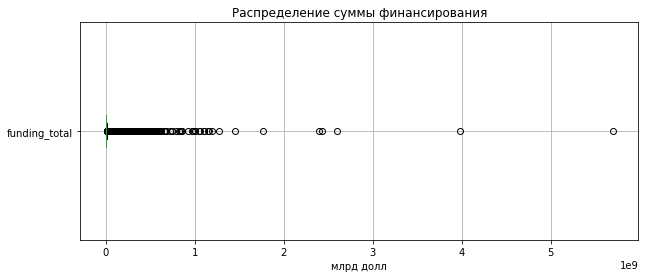

In [63]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 4))
df.boxplot(column='funding_total', vert=False)
plt.title('Распределение суммы финансирования')
plt.xlabel('млрд долл')
plt.show()

Очень большая разница между значениями, но можно сказать что 99% всех данных находятся до значения 0,1 млрд долл.


### Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [64]:
df_free = df[((df['price_amount']==0) | (df['price_amount']==1)) & (df['funding_total']!=0)]
df_free.info()
display(df_free.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 25 to 40729
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id_rounds     1580 non-null   float64       
 1   name                  1580 non-null   object        
 2   category_code         1515 non-null   object        
 3   status                1580 non-null   object        
 4   founded_at            1253 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1508 non-null   object        
 7   network_username      784 non-null    object        
 8   country_code          1499 non-null   object        
 9   investment_rounds     1580 non-null   float64       
 10  funding_rounds        1580 non-null   float64       
 11  funding_total         1580 non-null   float64       
 12  milestones            1580 non-null   float64       
 13  price_amount    

,company_id_rounds,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,price_amount,acquiring_company_id,acquired_at
25,10054,jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,usa,0,7,121500000,3,0,23283,2013-08-13
63,101312,sidetour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,usa,0,3,4000000,2,0,11391,2013-09-18
66,101340,choicepass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,usa,0,1,250000,1,0,1972,2012-06-18
67,10137,producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,usa,0,3,1310000,2,0,757,2012-11-05
68,10139,tradecard,enterprise,acquired,1999-01-01,NaT,tradecard.com,tradecard,usa,0,2,44925000,1,0,44008,2013-04-01


In [65]:
# Рассмотрим данные, которые получились
print('Статистические показатели столбца funding_total:')
pd.set_option('display.float_format', '{:.0f}'.format)
df_free['funding_total'].describe(percentiles=[0.25, 0.5, 0.75,0.99])

Статистические показатели столбца funding_total:


count         1580
mean      17879002
std      145849532
min           3750
25%        2000000
50%        6000000
75%       15400000
99%      128667910
max     5700000000
Name: funding_total, dtype: float64

In [66]:
# Вычисляем квартили Q1 и Q3
Q1 = df_free['funding_total'].quantile(0.25)
Q3 = df_free['funding_total'].quantile(0.75)
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

Q1: 2000000.0
Q3: 15400000.0


In [67]:
# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1
print(f'Размах: {IQR}')

Размах: 13400000.0


In [68]:
# Определяем верхний порог для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Изначальный нижний порог:", lower_bound)

lower_threshold = max(0, lower_bound) # т.к. нижняя граница отрицательная, нужно привести ее к 0

print("Скорректированный нижний порог:", lower_threshold)
print(f'Верхний порог выбросов: {upper_bound}')

Изначальный нижний порог: -18100000.0
Скорректированный нижний порог: 0
Верхний порог выбросов: 35500000.0


Найдем процентиль верхнего порога. 

In [69]:
# Считаем ранг (позицию в отсортированном ряду)
rank = df_free['funding_total'].rank(method='max') # max для включения всех значений, равных upper_bound
# Находим ранг верхнего значения (вставляем верхнюю границу и определяем ее ранг)
rank_upper_bound = df_free['funding_total'].append(pd.Series([upper_bound])).rank(method='max').iloc[-1]
print("Ранг верхней границы", rank_upper_bound)
# Рассчитываем процентиль
percentile = (rank_upper_bound / len(df_free['funding_total'])) * 100

print(f"Верхняя граница {upper_bound} соответствует {percentile:.2f}-му процентилю")

Ранг верхней границы 1441.0
Верхняя граница 35500000.0 соответствует 91.20-му процентилю


Проанализировав межквартильный размах IQR, выяснилось, что нижний порог отрицательный. Это могло случиться,потому что данные сильно смещены вправо, и у них низкая дисперсия, поэтому нижний порог получился отрицательным, даже если в самих данных нет отрицательных значений.
А вот верхний порог выбросов указывает, что все что выше 35.5 миллионов можно считать потенциальными выбросами.


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Для выполнения этого задания, будем использовать столбец `price_amount` и `category_code`. Сначала отфильтруем и оставим ненулевые значения. 

In [70]:
# Чтобы избежать предупреждения от програмы, напишем следующий код
import warnings
warnings.filterwarnings('ignore')
# Фильтрация
df_price = df
df_price['price_amount']= df[df['price_amount']>0]
df_price = df.dropna(subset=['price_amount'])
df_price['price_amount'] = df_price['price_amount'].astype('float64')
print(df_price['price_amount'])

1           10
3         1001
32        1007
77      101519
83       10158
         ...  
40706     9949
40710    99685
40711      997
40719      999
40746    43233
Name: price_amount, Length: 2447, dtype: float64


In [71]:
# Сгруппироуем по столбцу category_code
price = df_price.groupby('category_code')['price_amount'].median().sort_values(ascending=False)
print(price)

category_code
local              285961
sports             273550
hospitality        271577
manufacturing      267421
finance            264672
transportation     259808
health             258130
education          254696
automotive         243452
fashion            239069
nanotech           221032
real_estate        171297
other               56075
medical             48618
messaging           46586
travel              45808
cleantech           39103
mobile              34188
biotech             33028
hardware            32684
consulting          32576
ecommerce           30958
public_relations    29998
software            28906
semiconductor       28335
social              27236
enterprise          26825
security            26702
network_hosting     26362
analytics           23588
photo_video         20559
games_video         20310
news                18315
search              14456
advertising         13204
web                  4849
music                 725
Name: price_amount, dtyp

In [72]:
# Проанализируем полученные данные 
price.describe()

count       37
mean    100558
std     107445
min        725
25%      26702
50%      33028
75%     239069
max     285961
Name: price_amount, dtype: float64

In [73]:
# Выведем топ-10 категорий с типично высокими ценами
display(price.head(10))

category_code
local            285961
sports           273550
hospitality      271577
manufacturing    267421
finance          264672
transportation   259808
health           258130
education        254696
automotive       243452
fashion          239069
Name: price_amount, dtype: float64

In [74]:
# Сгруппироуем по столбцу category_code
price_std = df_price.groupby('category_code')['price_amount'].std().sort_values(ascending=False)
print(price_std)

category_code
music              141920
transportation     133927
fashion            130517
finance            122024
real_estate        122007
automotive         120132
travel             117527
health             105609
messaging          101647
cleantech          101141
other               98237
hospitality         90503
education           89617
news                88534
ecommerce           78645
hardware            77439
games_video         74320
manufacturing       69455
consulting          68970
biotech             67081
mobile              65116
advertising         59016
software            58787
security            55169
semiconductor       50668
enterprise          47055
network_hosting     46760
web                 41510
public_relations    39840
search              39439
photo_video         23089
medical             17186
social              15240
analytics           14114
sports               4796
local                 NaN
nanotech              NaN
Name: price_amount, dtyp

In [75]:
# Проанализируем полученные данные 
price_std.describe()

count       35
mean     73630
std      37549
min       4796
25%      46908
50%      69455
75%     101394
max     141920
Name: price_amount, dtype: float64

In [76]:
# Выведем топ-10 категорий с наибольшим разбросом цен
display(price_std.head(10))

category_code
music            141920
transportation   133927
fashion          130517
finance          122024
real_estate      122007
automotive       120132
travel           117527
health           105609
messaging        101647
cleantech        101141
Name: price_amount, dtype: float64

Проделав анализ цен, можно отследить, что самой дорогой категорией является `local` (медианное значение равно 285961), а дешевое - `music` (медианное значение 725). 
При этом категория, где наибольший разброс - это `music` 141920,  а категорий где нет разбросов это `local` и `nanotech`.


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [77]:
# Проанализируем данные 
df['funding_rounds'].describe()

count   40747
mean        1
std         1
min         0
25%         1
50%         1
75%         2
max        15
Name: funding_rounds, dtype: float64

In [78]:
# Оставим ненулевые значения
df['funding_rounds'] = df[df['funding_rounds'] > 0]
df['funding_rounds'] = df['funding_rounds'].astype('float64')
# Группировка 
typical_rounds = df.groupby('status').agg({'funding_rounds': 'mean'}).sort_values(by = 'funding_rounds', ascending=False)
print(typical_rounds)

           funding_rounds
status                   
operating          129043
ipo                 73206
closed              52008
acquired            39828


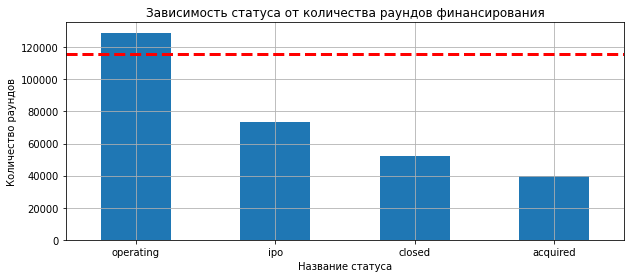

In [79]:
# Сразу строим визуализацию к полученным данным
typical_rounds.plot(kind='bar',
                    rot = 0,
                    legend=False,
                    title=f'Зависимость статуса от количества раундов финансирования',
                   figsize=(10, 4))
plt.xlabel('Название статуса')
plt.ylabel('Количество раундов')
plt.grid()
# Рассчитываем среднее количество раундов
mean_rating_share = df['funding_rounds'].mean()

# Наносим на график линию с средним количеством раундов
plt.axhline(mean_rating_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=3) # Ширина линии)
plt.show()

Статус `operating` чаще встречается, чем остальные, так в среднем `operating` равен 129043 раундов, что выше среднего в целом. А `acquired ` имеет 39828 раундов, что является наименьшим показателем.


## Итоговый вывод и рекомендации

**Общий обзор проделанной работы:**
В работе было проанализировано 5 датасетов, в которых есть информация о покупках одними компаниями других компаний, о компаниях и раундах финансирования, об образовании сотрудника, о сотрудниках, о типе образования сотрудника. 

**Ответы на исследовательские вопросы, или главные выводы:**

Исследовательский анализ данных позволил сделать следующие выводы:
1. Наибольшая группа по количеству сотрудников это категория "small", при этом именно в этой категории наибольшое количество необразованных 36.5% от всех сотрудников.
2. Проанализировав межквартильный размах IQR, выяснилось, что нижний порог отрицательный. Это могло случиться,потому что данные сильно смещены вправо, и у них низкая дисперсия, поэтому нижний порог получился отрицательным, даже если в самих данных нет отрицательных значений. А вот верхний порог выбросов указывает, что все что выше 35.5 миллионов можно считать потенциальными выбросами и он соответствует 91.2 процентилю.
3. Дороже всего категория стартапов "local" в среднем 285961 долл при этом ы этой категории нет разбросов.
4. Статусы также различны, лидером является "operating".

**Рекомендации на основе анализа данных:**

В качестве рекомендаций можно указать, что компание стоит присмотреться к средним компаниям (процент образованных сотрудников там выше), при этом отслеживать компании из категории `local` и чтобы статус был  `operating`.